Run the install cell below once to install project dependencies into the notebook kernel.

In [ ]:
# Install project requirements into the notebook kernel
%pip install -U -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Dataset on Huggingface
https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023

In [ ]:
# !pip install ujson

In [1]:
from huggingface_hub import hf_hub_download
from datasets import load_dataset
import pandas as pd
import ujson as json
import os

REV_PATH = "raw/review_categories/Grocery_and_Gourmet_Food.jsonl"
rev_file = hf_hub_download(
repo_id="McAuley-Lab/Amazon-Reviews-2023",
filename=REV_PATH,
repo_type="dataset",
)
ds_reviews = load_dataset("json", data_files=rev_file, split="train")

c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(ds_reviews)

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 14318520
})


In [3]:
records = ds_reviews.select(range(20000))  # grab first 100 rows
df_reviews = pd.json_normalize(records, sep=".")

print(df_reviews.head(20))


    rating                                              title  \
0      5.0                                 Excellent!  Yummy!   
1      5.0                                  Delicious!!! Yum!   
2      5.0             Extremely Delicious, but expensive imo   
3      5.0                                         Delicious!   
4      5.0                                        Great taste   
5      5.0                                             Yummy!   
6      5.0                     Excellent tea & smells divine!   
7      5.0                   Like drinking a wedding bouquet!   
8      5.0                                         Delicious!   
9      5.0                          Yummy tea with a cool tin   
10     5.0                                         Yummy tea!   
11     5.0                                         Delicious!   
12     5.0                        Yummy with jasmine flowers!   
13     5.0  OMG- purple tea! Color me happy!  Yum yum yummy!!   
14     5.0               

# Found a way to import meta dataset

In [4]:
from datasets import Dataset

REV_PATH = "raw/meta_categories/meta_Grocery_and_Gourmet_Food.jsonl"
rev_file = hf_hub_download(
repo_id="McAuley-Lab/Amazon-Reviews-2023",
filename=REV_PATH,
repo_type="dataset",
)

df = pd.read_json(
    rev_file,
    lines=True,
)

df = df[df['main_category'] == 'Grocery']

df.head(5)


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Grocery,Dark Roast Pure Coffee,4.7,9,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'YouCut_20220Cafe Du Monde Coffee C...,Luzianne,"[Grocery & Gourmet Food, Beverages, Coffee]","{'Brand': 'Luzianne', 'Item Form': 'Ground', '...",B00NE08WM6,NaN,NaN,NaN
1,Grocery,PICARAS Galletas Peruanas Bañadas en Chocolate...,4.5,12,[2 Bags of PICARAS Galletas Bañadas en Chocola...,[2 Bags of PICARAS Galletas Bañadas en Chocola...,15.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Winters,"[Grocery & Gourmet Food, Breads & Bakery, Cook...","{'Flavor': 'chocolate', 'Unit Count': '12.00 C...",B084Q13Q5Q,NaN,NaN,NaN
2,Grocery,Chipped Beef and Gravy By Patterson's - Great ...,3.2,5,[Six (6) 8-ounce cans of delicious chipped bee...,[Delicious corned beef gravy is ready when you...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Pattersons,"[Grocery & Gourmet Food, Pantry Staples, Canne...",{'Package Dimensions': '8.4 x 5.8 x 3.4 inches...,B00KBRUYVM,NaN,NaN,NaN
3,Grocery,Asher's Sugar Free Milk Chocolate Cordial Cher...,5.0,6,[],[],29.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'No Sugar Added Chocolate Truffles'...,Generic,"[Grocery & Gourmet Food, Snacks & Sweets, Choc...","{'Brand': 'Generic', 'Item Form': 'Ball', 'Cho...",B0BN4PW255,NaN,NaN,NaN
4,Grocery,Messmer Peppermint 25 bags (6er pack),3.5,5,[],[],29.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Messmer,[],"{'Brand': 'Messmer', 'Item Form': 'Teabags', '...",B06X9DC27H,NaN,NaN,NaN


In [5]:
keep_cols = ["average_rating", "rating_number","details","parent_asin"]

df = df[keep_cols]
df["details"] = df["details"].str.get("Flavor")
print(df.head(5))

   average_rating  rating_number    details parent_asin
0             4.7              9       None  B00NE08WM6
1             4.5             12  chocolate  B084Q13Q5Q
2             3.2              5       None  B00KBRUYVM
3             5.0              6  Chocolate  B0BN4PW255
4             3.5              5       None  B06X9DC27H


In [6]:
df = df.dropna(subset=['details'])
display(df.head())

,average_rating,rating_number,details,parent_asin
1,4.5,12,chocolate,B084Q13Q5Q
3,5.0,6,Chocolate,B0BN4PW255
6,5.0,2,Red Crab,B002HQF1BI
18,4.4,157,Savory,B005GTTQMI
23,4.2,474,Cherry,B097NMZRBR


In [7]:
rating_num_median = df['rating_number'].median()
print(rating_num_median)
print(df.shape)

15.0
(138685, 4)


In [8]:
df = df[df['rating_number'] >= rating_num_median]
print(df.head(10))

    average_rating  rating_number             details parent_asin
18             4.4            157              Savory  B005GTTQMI
23             4.2            474              Cherry  B097NMZRBR
26             4.6             41                 Hot  B00AN0ODVY
36             4.7            503                cafe  B01EM498G6
37             3.7            493     10 PACK SAMPLER  B07CP39T8G
39             4.0             58            Licorice  B00NZ8OCNU
40             4.0             19           Chamomile  B07ZVBKYWV
41             4.4             47                Pork  B088GYGLZG
42             4.2             21            Barbecue  B077V3RTZV
45             4.6             66  Sweet or Scary Mix  B01LXZTQB1


# **Filtering flavors**

In [9]:
top_flavors = df["details"].value_counts().nlargest(25).index

df = df[df["details"].isin(top_flavors)]

print(df["details"].value_counts())

details
Chocolate         3656
Original          1391
Assorted          1298
Fruit             1093
Milk Chocolate    1014
Caramel           1006
Vanilla            972
Strawberry         856
Dark Chocolate     818
Cherry             757
Lemon              745
Coffee             696
Beef               694
Cinnamon           682
Mint               654
Orange             625
Peppermint         614
Coconut            542
Espresso           524
Honey              465
Butter             463
Sour               440
Ginger             432
Chicken            410
Almond             405
Name: count, dtype: int64


Deleting irrelvant flavors

In [10]:
irrelevant = ["Original", "Assorted"]
df = df[~df["details"].isin(irrelevant)]
df.head(25)

,average_rating,rating_number,details,parent_asin
23,4.2,474,Cherry,B097NMZRBR
69,4.7,665,Peppermint,B00250M2ZY
72,3.6,52,Chocolate,B096XY398G
113,4.4,229,Espresso,B00679HRUY
132,4.4,290,Dark Chocolate,B0BZ7T51JZ
188,4.7,18,Chocolate,B00IMQ1O9A
224,4.1,188,Milk Chocolate,B0979Q4ZW1
279,4.3,483,Beef,B00YJX55R2
328,4.6,1766,Fruit,B01M5KNOF5
334,2.6,32,Caramel,B00II5VYM2


In [11]:
df.shape

(18563, 4)

In [12]:
df_merged_inner = pd.merge(
    df,
    df_reviews,
    on='parent_asin',
    how='inner'
)

columns_to_drop = [
    'images',
    'asin',
    'helpful_vote',
    'verified_purchase',
    'title'
]

df_merged_inner.drop(columns=columns_to_drop, axis=1, inplace=True)

print(df_merged_inner.columns.tolist())
print(f"\nNew DataFrame shape: {df_merged_inner.shape}")

print(df_merged_inner.head(5))


['average_rating', 'rating_number', 'details', 'parent_asin', 'rating', 'text', 'user_id', 'timestamp']

New DataFrame shape: (618, 8)
   average_rating  rating_number     details parent_asin  rating  \
0             4.2            474      Cherry  B097NMZRBR     5.0   
1             4.7            665  Peppermint  B00250M2ZY     4.0   
2             3.6             52   Chocolate  B096XY398G     5.0   
3             4.6           1474       Lemon  B0C7RH8PQQ     5.0   
4             4.6           1474       Lemon  B0C7RH8PQQ     3.0   

                                                text  \
0  Very fresh... they remind me of the candy I wo...   
1  These are a little like a butter mint... they ...   
2  great for baking whether you warm it for choco...   
3  Absolutely addicting-any flavor.  The only pro...   
4  I have been looking for a great lemon cookie. ...   

                        user_id      timestamp  
0  AHQE5UGNEVWAJN6X7JN6RNQTIPWQ  1616344952930  
1  AFZUK3MTBIBEDQOPAK

In [13]:
irrelevant = ["Original", "Assorted"]

df_clean = df_merged_inner[~df_merged_inner["details"].isin(irrelevant)]

df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], unit='ms')
df_clean['year_month'] = df_clean['timestamp'].dt.to_period('M').astype(str)

trend_df = (
    df_clean
    .groupby(['details', 'year_month'])['rating']
    .mean()
    .reset_index()
)

df_merged_inner.columns

Index(['average_rating', 'rating_number', 'details', 'parent_asin', 'rating',
       'text', 'user_id', 'timestamp'],
      dtype='object')

In [14]:
df_merged_inner.columns

# ['average_rating', 'rating_number', 'details', 'parent_asin', 
#  'rating', 'text', 'user_id', 'timestamp']

df_merged_inner['details'].unique()

import pandas as pd
#Convert timestamp to datetime
df_merged_inner['timestamp'] = pd.to_datetime(df_merged_inner['timestamp'], unit='ms')
#df_merged_inner['year_month'] = df_merged_inner['timestamp'].dt.to_period('M').astype(str)
df_merged_inner['year_month'] = df_merged_inner['timestamp'].dt.to_period('M').dt.to_timestamp()


#avg rating per month
trend_df = (
    df_merged_inner
    .groupby(['details', 'year_month'])['rating']
    .mean()
    .reset_index()
)
trend_df.head()


# trend_df['details'].value_counts()
# trend_df.head(20)


,details,year_month,rating
0,Almond,2012-11-01,5.0
1,Almond,2015-08-01,5.0
2,Almond,2017-10-01,3.0
3,Almond,2018-12-01,1.0
4,Almond,2019-01-01,3.0


Average Rating of Top 10 Most-Reviewed Flavors

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Chocolate'),
  Text(1, 0, 'Caramel'),
  Text(2, 0, 'Vanilla'),
  Text(3, 0, 'Dark Chocolate'),
  Text(4, 0, 'Butter'),
  Text(5, 0, 'Milk Chocolate'),
  Text(6, 0, 'Lemon'),
  Text(7, 0, 'Cinnamon'),
  Text(8, 0, 'Orange'),
  Text(9, 0, 'Coffee')])

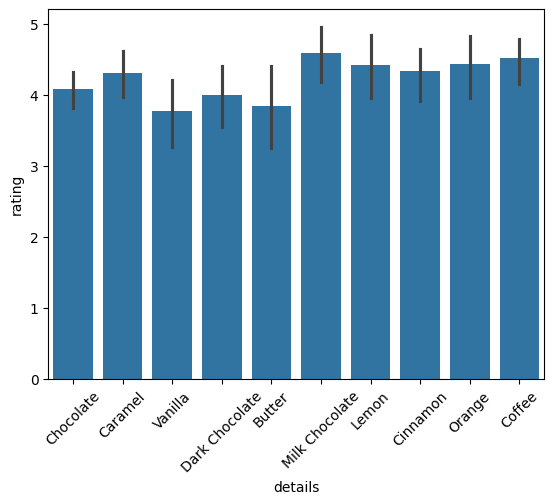

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(
    data=df_merged_inner,
    x='details',
    y='rating',
    estimator='mean',
    order=df_merged_inner['details'].value_counts().index[:10]
)
plt.xticks(rotation=45)

In [39]:
df_merged_inner.shape

(618, 9)

Trends over time

FacetGrid (small multiples per flavor)
I split the data so every flavor gets its own mini-trend chart. This way each flavor becomes readable. Trend direction becomes obvious (stable, increasing, decreasing, seasonal, etc.). This is the first visualization where patterns became meaningful. Some flavors like Vanilla show stable ratings, while others like Cinnamon show volatility.

In [16]:
top_flavors = df_merged_inner['details'].value_counts().head(10).index
trend_df_filtered = trend_df[trend_df['details'].isin(top_flavors)]

In [17]:
trend_df['rating_smooth'] = trend_df.groupby('details')['rating'].transform(lambda x: x.rolling(3, min_periods=1).mean())

In [18]:
# Merge reviews with product data
df_merged = pd.merge(
    df,
    df_reviews[['parent_asin', 'rating', 'timestamp', 'text']],
    on='parent_asin',
    how='left'
 )

# Drop flavors with too few reviews
min_reviews = 30
valid_flavors = df_merged.groupby('details').size()
valid_flavors = valid_flavors[valid_flavors >= min_reviews].index
df_final = df_merged[df_merged['details'].isin(valid_flavors)]

# Sort by timestamp
df_final = df_final.sort_values('timestamp')

# Create smoothed rating
df_final['rating_smooth'] = (
    df_final.groupby('details')['rating']
           .transform(lambda x: x.rolling(3, min_periods=1).mean())
)


Plot Each Flavor Separately (FacetGrid)

c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\

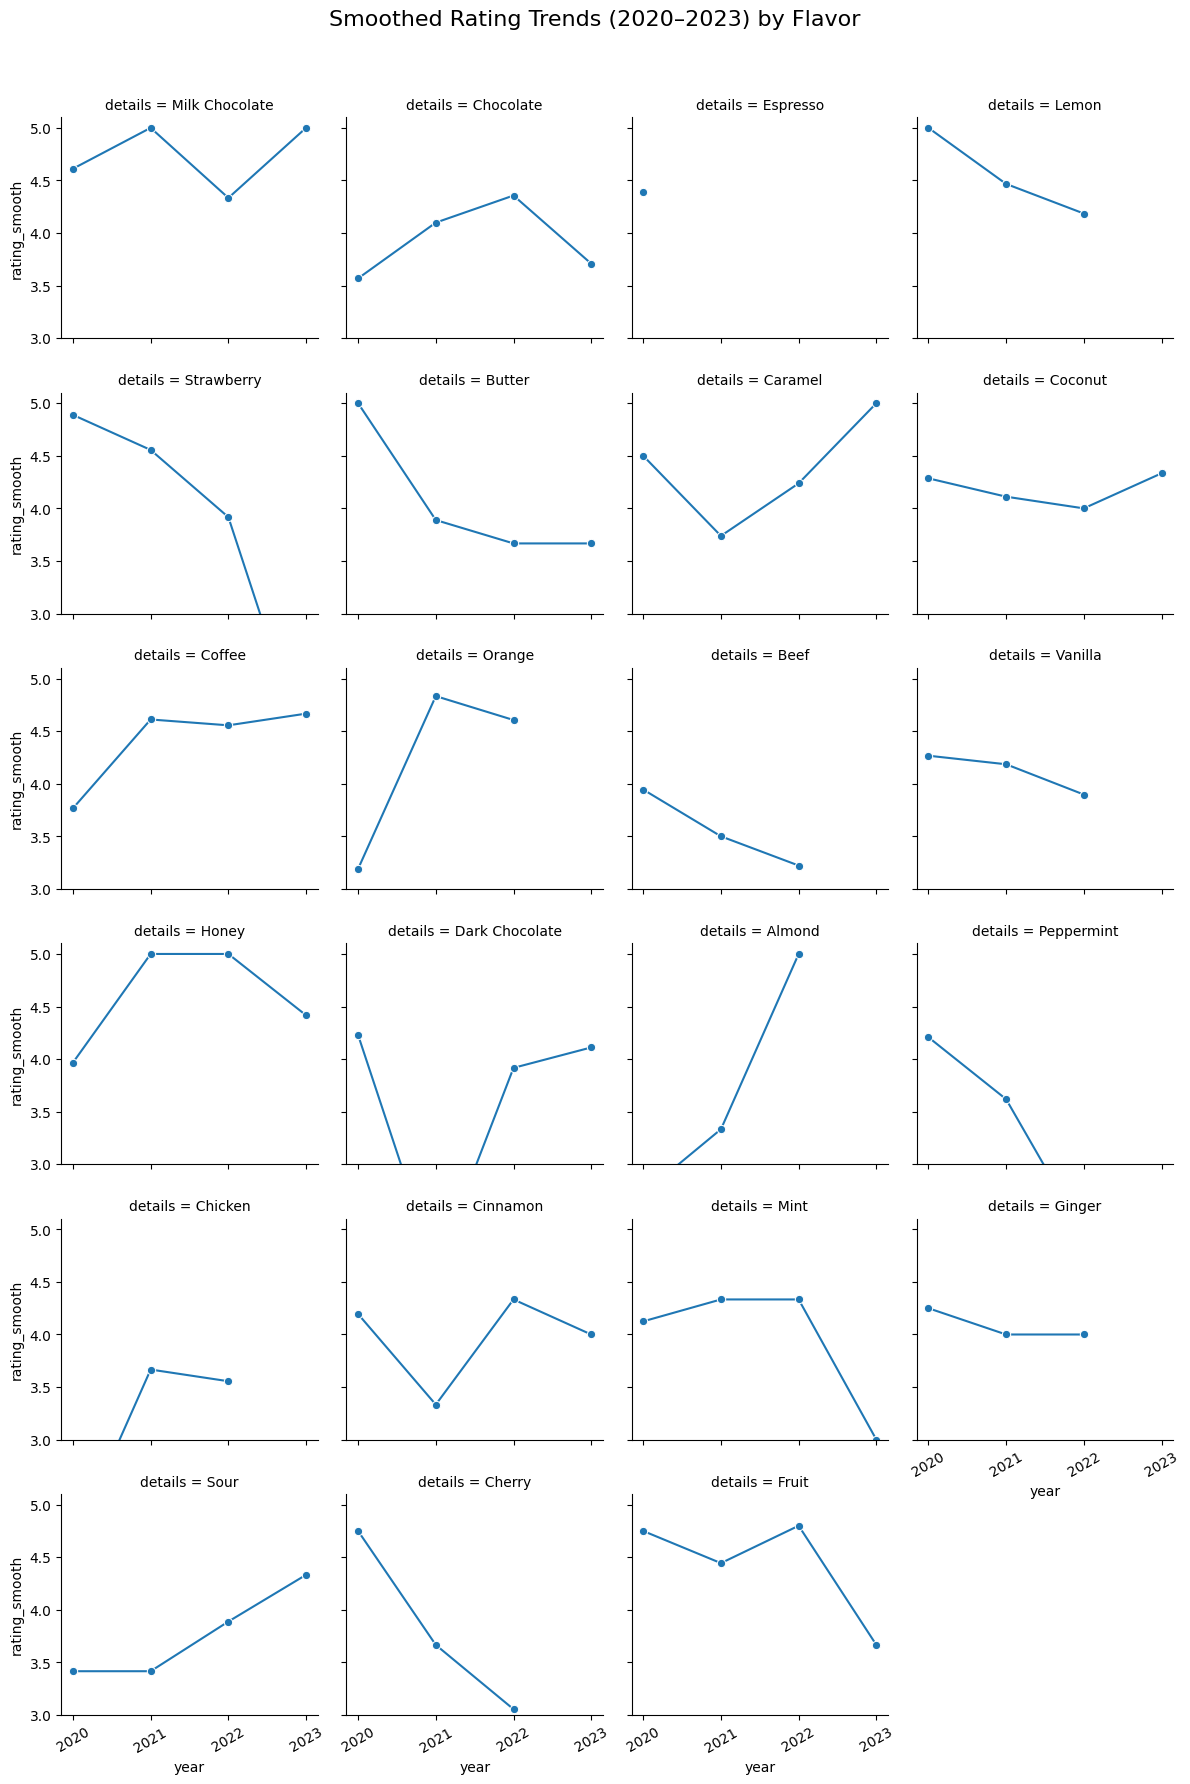

In [19]:
# ---------------------------
# 1. Filter to 2020–2023 Only
# ---------------------------

df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], unit='ms', errors='coerce')
df_final['year'] = df_final['timestamp'].dt.year
df_final = df_final[df_final['year'] >= 2020]

# ------------------------------------------
# 2. Smooth Ratings (Rolling Mean)
# using a 3-point rolling window
# ------------------------------------------
df_final['rating_smooth'] = (
    df_final.sort_values('timestamp')
    .groupby('details')['rating']
    .transform(lambda x: x.rolling(3, min_periods=1).mean())
)

# ------------------------------------------
# 3. Plot FacetGrid Trends by Flavor
# ------------------------------------------
g = sns.relplot(
    data=df_final,
    x='year',
    y='rating_smooth',
    col='details',
    col_wrap=4,
    kind='line',
    ci=None,     
    height=3,
    marker='o', 
    facet_kws={'sharex': True, 'sharey': True}
)

# ------------------------------------------
# 4. Clean Up Tick Labels (NO MORE WEIRD LINES)
# ------------------------------------------
for ax in g.axes.flatten():
    ax.set_xticks([2020, 2021, 2022, 2023])  # clean yearly ticks
    ax.tick_params(axis='x', rotation=30)   # small, readable
    ax.set_ylim(3, 5.1)                     # consistent y-scale

plt.subplots_adjust(top=0.92)
g.fig.suptitle("Smoothed Rating Trends (2020–2023) by Flavor", fontsize=16)
plt.show()


Plot Top Flavors Together (Smoothed)

Text(0.5, 1.0, 'Average Review Rating per Flavor')

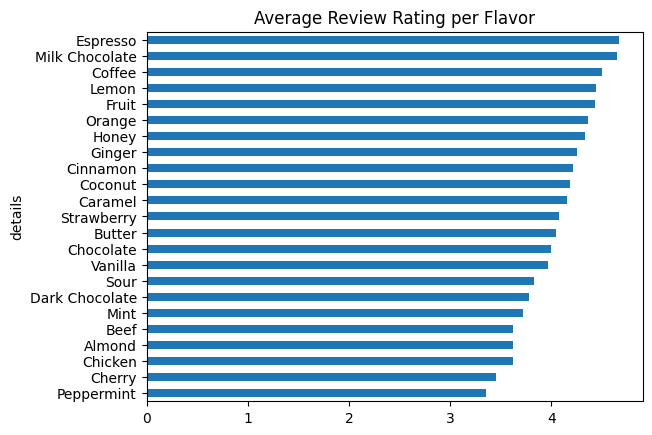

In [20]:
df_final.groupby('details')['rating'].mean().sort_values().plot(kind='barh')
plt.title("Average Review Rating per Flavor")

## Sentiment analysis with a BERT sentiment model

We will use a pre-trained BERT-style sentiment model from Hugging Face (`nlptown/bert-base-multilingual-uncased-sentiment`) to infer sentiment from review text. It outputs 1–5 star style labels.

The notebook cells below load the model, run batched inference on `df_final['text']`, attach numeric sentiment scores (1-5) to `df_final`, then aggregate and plot trends by flavor (2020–2023).

In [21]:
# Load the BERT sentiment pipeline
import torch
from transformers import pipeline
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
device = 0 if torch.cuda.is_available() else -1
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model=model_name,
    tokenizer=model_name,
    device=device
)
print('Loaded pipeline on device', device)

Device set to use cpu


Loaded pipeline on device -1


In [23]:
# Run batched inference over `df_final['text']` and attach results
import re
from tqdm import tqdm
# Ensure `df_final` exists (run earlier cells if not)
try:
    df_final
except NameError:
    raise RuntimeError('DataFrame `df_final` not found. Run the earlier data-prep cells first.')
# Prepare texts
texts = df_final['text'].fillna('').astype(str).tolist()
batch_size = 32
results = []
for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i+batch_size]
    # Prefer letting the tokenizer handle truncation to avoid model indexing errors
    try:
        outs = sentiment_pipe(batch, truncation=True, max_length=512)
    except RuntimeError as e:
        # Fallback: process items individually (slower) and ensure truncated input
        outs = []
        for t in batch:
            try:
                out = sentiment_pipe(t, truncation=True, max_length=512)
                # pipeline returns a list for a single input, take first element
                outs.append(out[0] if isinstance(out, list) else out)
            except Exception as e2:
                outs.append({'label': None, 'score': None})
    # Normalize outputs: some pipelines return list-of-lists
    for item in outs:
        if isinstance(item, list):
            results.append(item[0])
        else:
            results.append(item)
# Ensure results length matches texts length
if len(results) < len(texts):
    # pad with Nones (shouldn't normally happen)
    pad_count = len(texts) - len(results)
    results.extend([{'label': None, 'score': None}] * pad_count)
# Parse labels like '1 star' or '5 stars' into integers
labels = []
scores = []
for out in results:
    label = out.get('label') if isinstance(out, dict) else None
    score = out.get('score') if isinstance(out, dict) else None
    # Some models return labels like '1 star' or '5 stars', extract digit if present
    if isinstance(label, str):
        m = re.search(r'([1-5])', label)
        num = int(m.group(1)) if m else None
    else:
        num = None
    labels.append(label)
    # Convert score to a sensible 1-5 scale if model returned a star label + score (score is confidence)
    # If the model already returns a numeric star (some models do), prefer that.
    if num is not None:
        scores.append(num)
    else:
        # If we only have a probability score, leave numeric sentiment as None
        scores.append(None)
# Attach to df_final (same order as df_final)
df_final['bert_sentiment_label'] = labels
df_final['bert_sentiment_score'] = scores
print('Attached sentiment scores to df_final:', df_final[['bert_sentiment_label','bert_sentiment_score']].shape)

100%|██████████| 13/13 [00:36<00:00,  2.81s/it]

Attached sentiment scores to df_final: (408, 2)


In [30]:
df_final.head()

,average_rating,rating_number,details,parent_asin,rating,timestamp,text,rating_smooth,year,bert_sentiment_label,bert_sentiment_score,year_month,rating_sentiment,bert_sentiment_cat
3486,4.5,106,Milk Chocolate,B07KFXM3P5,5.0,2020-01-03 13:30:13.093,These are addicting! So good!,5.000000,2020.0,5 stars,5,2020-01,positive,positive
3943,4.1,63,Chocolate,B07MMWVL6J,4.0,2020-01-05 17:13:47.383,Good,4.000000,2020.0,4 stars,4,2020-01,positive,positive
6968,4.2,57,Chocolate,B074B9L6H5,5.0,2020-01-10 20:48:26.289,flavor beautiful and good. Use for gifts this...,4.500000,2020.0,5 stars,5,2020-01,positive,positive
17844,4.4,97,Chocolate,B07YNW1JZJ,4.0,2020-01-12 14:21:04.749,This was a fun gift set! It's full of 12 delic...,4.333333,2020.0,4 stars,4,2020-01,positive,positive
4939,3.9,31,Espresso,B07ZQCRPY7,4.0,2020-01-21 12:59:55.951,Finally a non nesspresso brand that actually t...,4.000000,2020.0,5 stars,5,2020-01,positive,positive


In [34]:
df_final.shape

(408, 14)

Top-10 flavors (by review count) from df_final:
details
Chocolate         86
Caramel           33
Vanilla           27
Orange            22
Butter            21
Lemon             18
Dark Chocolate    18
Milk Chocolate    17
Sour              17
Coffee            16
Name: count, dtype: int64


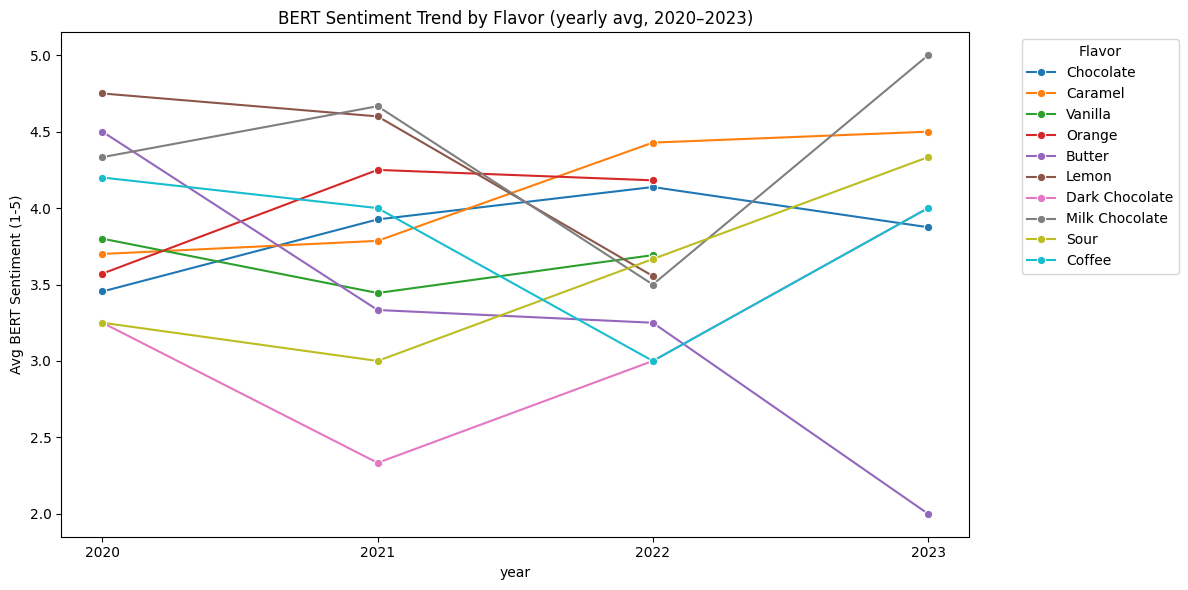

c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\

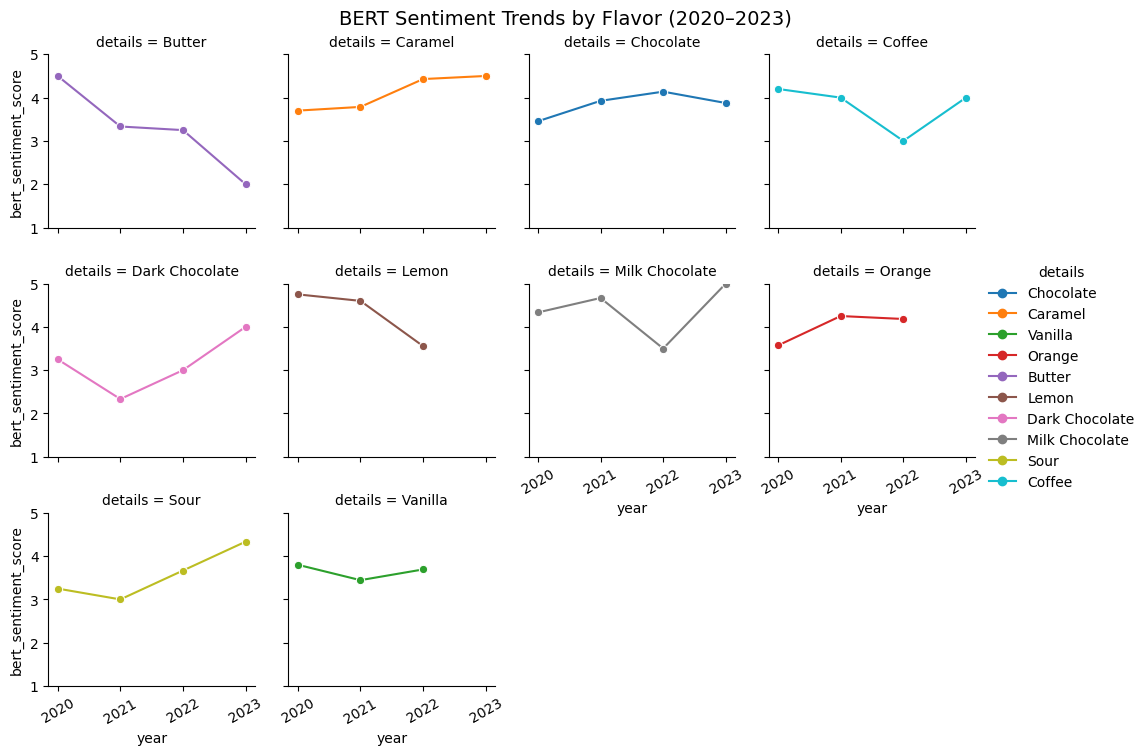

In [42]:
# Aggregate sentiment by flavor and year (2020-2023), then plot top flavors over time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is datetime and create year
if not pd.api.types.is_datetime64_any_dtype(df_final['timestamp']):
    try:
        df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], unit='ms', errors='coerce')
    except Exception:
        df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], errors='coerce')
df_final['year'] = df_final['timestamp'].dt.year

# Filter to 2020-2023
df_year = df_final[df_final['year'].between(2020, 2023)]

# Compute yearly average BERT sentiment per flavor (ignores NaNs)
sentiment_trend = df_year.groupby(['details','year'])['bert_sentiment_score'].mean().reset_index()

# Determine top-10 most-reviewed flavors using df_final (where sentiment scores live)
top_flavors = df_final['details'].value_counts().head(10).index.tolist()

# Print the top flavors and their review counts for confirmation
print('Top-10 flavors (by review count) from df_final:')
print(df_final['details'].value_counts().head(10))

# Filter sentiment_trend to only those top flavors
sent_plot = sentiment_trend[sentiment_trend['details'].isin(top_flavors)]

# -- 1) Combined yearly trend (all top flavors) --
plt.figure(figsize=(12,6))
sns.lineplot(data=sent_plot, x='year', y='bert_sentiment_score', hue='details', hue_order=top_flavors, marker='o', palette=sns.color_palette('tab10', n_colors=len(top_flavors)))
plt.xticks([2020,2021,2022,2023])
plt.ylabel('Avg BERT Sentiment (1-5)')
plt.title('BERT Sentiment Trend by Flavor (yearly avg, 2020–2023)')
plt.legend(title='Flavor', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# -- 2) Small-multiples: one yearly trend plot per flavor (FacetGrid) --
g = sns.relplot(
    data=sent_plot,
    x='year',
    y='bert_sentiment_score',
    col='details',
    col_wrap=4,
    kind='line',
    ci=None,
    height=2.5,
    facet_kws={'sharex': True, 'sharey': True},
    marker='o',
    hue='details',
    hue_order=top_flavors,
    palette=sns.color_palette('tab10', n_colors=len(top_flavors))
 )
# Clean up axes for readability
for ax in g.axes.flatten():
    ax.set_xticks([2020,2021,2022,2023])
    ax.tick_params(axis='x', rotation=30)
    # set consistent y-scale 1.0-5.0 (model outputs 1-5 star scale)
    ax.set_ylim(1.0, 5.0)
# Title and layout
plt.subplots_adjust(top=0.92)
g.fig.suptitle('BERT Sentiment Trends by Flavor (2020–2023)', fontsize=14)
plt.show()

In [ ]:
# Baseline: map numeric ratings to simple sentiment categories and compare to BERT
def rating_to_sentiment(r):
    if r <= 2:
        return 'negative'
    elif r == 3:
        return 'neutral'
    else:
        return 'positive'

df_final['rating_sentiment'] = df_final['rating'].apply(rating_to_sentiment)
df_final['bert_sentiment_cat'] = df_final['bert_sentiment_score'].apply(lambda s: 'negative' if s<=2 else ('neutral' if s==3 else 'positive'))

# Show confusion / agreement table
confusion = pd.crosstab(df_final['rating_sentiment'], df_final['bert_sentiment_cat'])
display(confusion)

# Normalized (by rows) for easier comparison
confusion_norm = pd.crosstab(df_final['rating_sentiment'], df_final['bert_sentiment_cat'], normalize='index')
display(confusion_norm)

bert_sentiment_cat,negative,neutral,positive
rating_sentiment,,,
negative,57,10,4
neutral,20,12,8
positive,13,18,266


bert_sentiment_cat,negative,neutral,positive
rating_sentiment,,,
negative,0.802817,0.140845,0.056338
neutral,0.500000,0.300000,0.200000
positive,0.043771,0.060606,0.895623


The final cell compares the numeric star rating given by the customer (the original rating column) to the BERT sentiment score assigned by the model.

#### Sentiment Categorization

The code first maps both the original customer rating and the BERT score into three simple categories:

- Negative: Original rating $\leq 2$ OR BERT score $\leq 2$
- Neutral: Original rating $= 3$ OR BERT score $= 3$
- Positive: Original rating $\geq 4$ OR BERT score $\geq 4$

#### Confusion Table (Counts)

- Rows (rating_sentiment): The sentiment category based on the customer's original 1-5 star rating.
- Columns (bert_sentiment_cat): The sentiment category based on the BERT model's 1-5 star score.

#### Interpretation (e.g., Row 1):

- There were 57 reviews where the customer rating was negative ($\leq 2$) AND the BERT score was also negative ($\leq 2$). This is strong agreement.
- There were 4 reviews where the customer rating was negative, but the BERT model scored them as positive ($\geq 4$). This is strong disagreement.

#### Normalized Confusion Table (Percentages)

This table shows the same data, but normalized by row, meaning each row adds up to 1 (or 100%).

#### Interpretation (e.g., Row 3 - Positive):

- When a customer gave a positive rating (≥4 stars), the BERT model agreed and scored it as positive 89.6% of the time.
- It only disagreed and scored a customer's positive review as negative (≤2) 4.4% of the time.

Purpose: This normalization makes it easy to assess the accuracy of the BERT model against the existing star ratings. The model appears to be highly reliable, especially for clear positive and negative reviews. The code is successfully applying a modern NLP model to extract more nuanced data (BERT sentiment) than a simple star rating and using that data to plot trends and verify the model's accuracy.